# Projeto 1 - Predição da precificação de casas 
## House Sales in King County, USA - Kaggle

Nome: Henrique Grandi Baldo

## Introdução

Este é um conjunto de dados armazenado no Kaggle, uma plataforma de estudo e competições de Ciência de Dados. Segue a tradução sobre o conjunto de dados.

**"Este conjunto de dados contém preços de venda de casas para King County, que inclui Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015."**

Segue a descrição das variaveis:

- id - identificação unica para cada venda
- date - data da venda
- price - preço da venda
- bedrooms - número de quartos
- bathrooms - número de banheiros
- sqft_living - tamanho da casa em pés quadrados
- sqft_lot - tamanho do lote pés quadrados
- floors - número de andares
- waterfront - vista para praia, lago, rio...
- view - Um índice de 0 a 4 de quão boa era a vista da propriedade
- condition - condição da casa
- grade - nota de qualidade (baseado no sistema de classificação do King County)
- sqft_above - tamanho da área abaixo da casa em pés quadrados
- sqft_basement - tamanho do porão em pés quadrados
- yr_built - ano de construção
- yr_renovated - ano da ultima reforma
- zipcode - CEP
- lat - latitude
- long - longitude
- sqft_living15 - Tamanho médio do espaço habitacional interior para as 15 casas mais próximas, em pés quadrados
- sqft_lot15 - Tamanho médio dos lotes para as 15 casas mais próximas, em pés quadrados

# Sobre este projeto

Este é o seu primeiro projeto usando Ciência de Dados. Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo usando regressão linear e justificar(métricas, r2 e erro(mse))

# Preparação do ambiente

- Acessem o link - https://www.kaggle.com/datasets/harlfoxem/housesalesprediction e logo abaixo cliquem em "Download". Caso voce não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download.

Importando as bibliotecas necessárias para realização do projeto

In [ ]:
# importando as bibliotecas necessárias:
import pandas as pd
import numpy as np
import math
import statistics

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices

# bibliotecas para padronizar os dados e buscar pelas variaveis mais representativas
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

# separacao em treino/teste e modelo de regressao
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# metricas
from sklearn.metrics import r2_score, mean_absolute_error as mae

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Lendo o arquivo da base de dados, é necessario fazer o uploud do arquivo antes de rodar o code abaixo:

In [ ]:
house = pd.read_csv('kc_house_data.csv')

Vamos testar o dataframe e dar uma olhada geral nas colunas

In [ ]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Vamos ver com quantas colunas e linhas estamos trabalhando 

In [ ]:
house.shape

(21613, 21)

# Exercicio 1. (0.5 pontos)

* Formule ao menos duas perguntas que você acha que poderiam ser respondidas usando os dados
* RESPOSTA (VALE 0.5 pontos)
* Bom, vamos nos situar, estamos trabalhando com dados de casas, como visto anteriormente, temos 21 variaveis e 21613 linhas. O objetivo dessas variaveis é mostrar que atravez delas podemos predizer o valor de determinada casa. Então, temos que procurar por dependencia das variaveis em relação ao preço, o quanto cada variavel interefe no preço. Para isso iremos, mais a diante, fazer análises de todos os dados, olhar para eles separadamente mas por agora ficam duas perguntas:

1. **PERGUNTA:** Olhando o significado de todas as variáveis, tem duas que nos chamam a atenção, "sqft_living15" e "sqft_lot15". Fazem sentido estarem na base de dados, explique um pouco mais sobre elas.




**RESPOSTA:** Essas duas variáveis refere-se a área média das 15 casas e dos 15 terrenos mais próximos, dos vizinhos. Assim, de primeira impressão não faz muito sentido estarem numa tabela que compara preços mas acredito que essas medidas mostram como é a região, como é o bairro em si e isso com toda certeza ajuda a valorizar um imóvel. Então a comparação que podemos fazer é olhar para essa média dos vizinhos e comparar com a área da casa em questão. Desta maneira já temos a noção se aquela casa é grande ou pequena em relação ao seu bairro. Com toda a certeza essas variáveis têm influência em seus preços. Hoje é normal do ser humano olhar ao redor para se sentir "bem", há controvercias, mas essa discussão podemos deixar para outra hora. O que temos que ressalvar aqui é que não temos noção do tamanho do impacto no preço, e esse impacto tentaremos conhecer mais para frente. 

2. **PERGUNTA** Olhando a grosso modo para as variáveis, sem fazer uma análise profunda, quais a princípio interferem mais no preço, levando em conta o seu conhecimento empírico.

**RESPOSTA:** Quando as pessoas vão olhar casas, a primeira pergunta é, quantos quartos e quantos banheiros, não é a toa que são as primeiras variáveis dessa nossa base de dados, até mesmo antes do tamanho em si da casa, porque não adianta ter uma casa gigante com poucos quartos. Isso também responde o por que temos tantas variáveis para definir o valor da casa, são inúmeros detalhes que temos que levar em conta. Tirando as áreas da casa e do terreno e o número de banheiros e quartos, vamos escolher outras 3 váriaveis que consideraria numa possível escolha, em ordem de importância: zipcode(CEP -considero a localização primordial na escolha, porque precisamos nos deslocar para trabalhar, lazer, estudo...), condition(condição da casa - o quanto ela esta cuidada, aparência em si), view(a vista da casa, acodar e tem uma boa vista pode ser motivante para o resto do dia). 

# Exercicio 2. (2.5 pontos)

A capacidade de comunicação é um dos principais pontos na análise de dados, pois sua análise deve ser tão boa quanto a sua capacidade de comunicá-la. Para isso usamos tabelas resumo e gráficos para apresentar os principais achados do trabalho realizado. Podemos adicionar outros materias que possam aprofundar essa apresentação como artigos e outros estudos realizados.

Assim, qual visualização você acha interessante destacar? RESPOSTA(VALE 0.75 pontos) 

In [ ]:
#### (VALE 1.5 pontos)
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

- Para começar a análise dos dados, vamos olhar para todas as colunas, já sabemos o que cada uma representa, porem agora temos que começar a entender o porque delas estarem ali e se tem alguma que podemos retirar logo de começo.
- Para deixar mais limpa a nossa base de dados, vamos começar excluindo a coluna 'id', pois ela apenas nos traz a identificação das casas, o que não nos é util para uma futura análise de regressão linear, pois, não há relação com o preço das casas.

In [ ]:
house = house.drop(columns = ['id'])

In [ ]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Podemos ver também, olhando para a tabela, que a coluna 'date' talvez possa ser retirada da nossa análise.

In [ ]:
house['date'].sort_values()

16768    20140502T000000
9596     20140502T000000
9587     20140502T000000
20602    20140502T000000
11577    20140502T000000
              ...       
7898     20150514T000000
928      20150514T000000
5637     20150515T000000
13053    20150524T000000
16594    20150527T000000
Name: date, Length: 21613, dtype: object

Essa variavel nos trás a data que foram feitas as vendas, porem por se tratar de datas muito proximas elas possam mais atrapalhar que ajudar na análise, as casas não tendem a valorizar ou desvalorizar, significantemente, em tão pouco tempo

In [ ]:
house = house.drop(columns = ['date'])

Como podemos constatar, as áreas estão todas em pés quadrados, uma medida americana, então temos que transformar as unidades de medidas. Vamos trabalhar com metros quadrados para melhorar o nosso entendimento, usaremos a transformação 1ft² = 0.092903m² para todas as colunas que trabalham com áreas.

In [ ]:
house['sqft_living'] = round(house['sqft_living']*0.092903,2) 
house['sqft_lot'] = round(house['sqft_lot']*0.092903,2)
house['sqft_above'] = round(house['sqft_above']*0.092903,2) 
house['sqft_basement'] = round(house['sqft_basement']*0.092903,2) 
house['sqft_living15'] = round(house['sqft_living15']*0.092903,2) 
house['sqft_lot15'] = round(house['sqft_lot15']*0.092903,2) 

- Agora vamos fazer uma análise um pouco mais profunda
- Vamos começar analisando o tamanho da casa em relação ao tamanho das casas dos vizinhos para entender se é possível saber o quanto isso impacta no preço. Para isso criarei uma variável com a diferença entre o tamanho da casa e a dos vizinhos

In [ ]:
house['comp_living'] = house['sqft_living']- house['sqft_living15']
house['comp_lot'] = house['sqft_lot']- house['sqft_lot15']
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,comp_living,comp_lot
0,221900.0,3,1.00,109.63,524.90,1.0,0,0,3,7,...,0.00,1955,0,98178,47.5112,-122.257,124.49,524.90,-14.86,0.00
1,538000.0,3,2.25,238.76,672.80,2.0,0,0,3,7,...,37.16,1951,1991,98125,47.7210,-122.319,157.01,709.69,81.75,-36.89
2,180000.0,2,1.00,71.54,929.03,1.0,0,0,3,6,...,0.00,1933,0,98028,47.7379,-122.233,252.70,748.98,-181.16,180.05
3,604000.0,4,3.00,182.09,464.52,1.0,0,0,5,7,...,84.54,1965,0,98136,47.5208,-122.393,126.35,464.52,55.74,0.00
4,510000.0,3,2.00,156.08,750.66,1.0,0,0,3,8,...,0.00,1987,0,98074,47.6168,-122.045,167.23,697.05,-11.15,53.61


Agora vamos plotar um gráfico de dispersão para ver como esses valores se comportam, primeiramente vamos analisar a área da casa

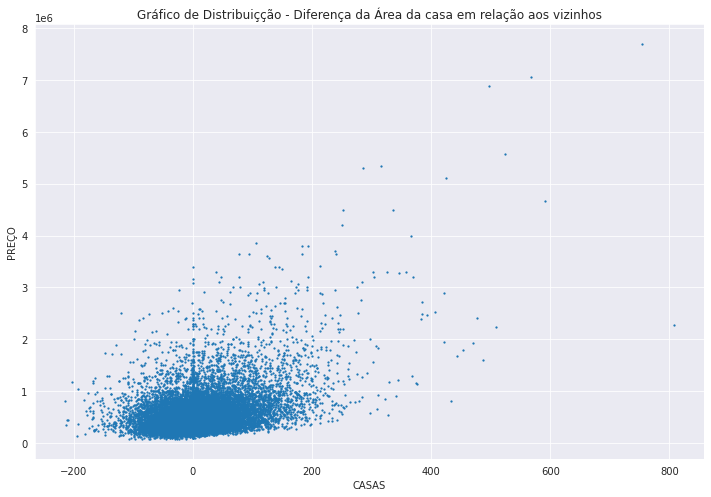

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize=[12,8])
ax = plt.scatter(house['comp_living'], house['price'],s=1.5)  
plt.title('Gráfico de Distribuiçção - Diferença da Área da casa em relação aos vizinhos', fontsize=12)
plt.xlabel('Casas'.upper(), fontsize=10)
plt.ylabel('preço'.upper(), fontsize=10)
plt.show()

Podemos ver no gráfico que temos uma leve tendência de quanto maior for a diferença, positiva, das áreas das casas em relação à área de seus vizinhos, maior será o preço da casa. Com toda certeza somente com esses dados não conseguimos predizer valores, mas no conjunto, juntamente com os dados restantes poderemos ter uma boa resposta

Agora vamos dar uma olhada na diferença entre as áreas dos lotes

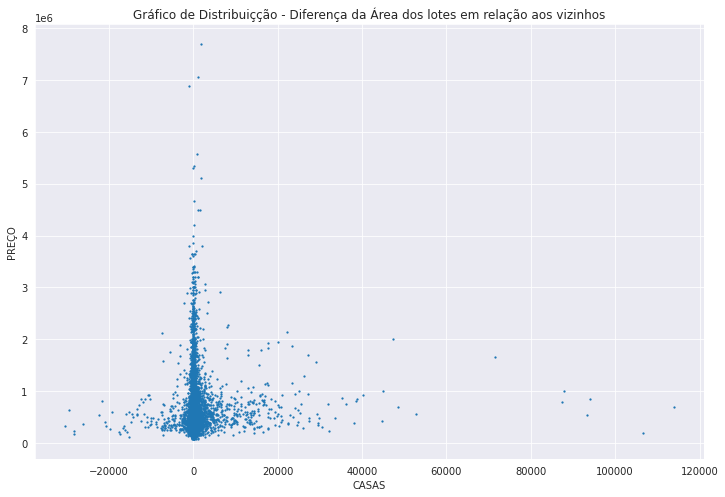

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize=[12,8])
plt.scatter(house['comp_lot'], house['price'],s=1.5)  
plt.title('Gráfico de Distribuiçção - Diferença da Área dos lotes em relação aos vizinhos', fontsize=12)
plt.xlabel('casas'.upper(), fontsize=10)
plt.ylabel('preço'.upper(), fontsize=10)
plt.show()

Já para a área total do lote não podemos dizer a mesma coisa, o comportamento do gráfico não nos diz nada, ficou concentrado no 0 e quando temos valores dispersos o preço não muda significantemente, se mantém na mesma linha, até mesmo aquele que tem uma diferença absurda, chegando a quase 120 mil metros quadrados

In [ ]:
house[house['comp_lot'] > 100000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,comp_living,comp_lot
1719,700000.0,4,1.0,120.77,153416.21,1.0,0,3,4,6,...,0.0,1920,0,98022,47.2313,-122.023,237.83,39537.75,-117.06,113878.46
17319,190000.0,2,1.0,65.96,108212.86,1.0,0,0,2,5,...,0.0,1915,0,98014,47.6888,-121.909,156.08,1554.27,-90.12,106658.59


Fomos tentar entender porque as casas com uma diferença tão grande de lotes não tinham preços mais elevados que as outras, e uma explicação que achei foi justamente na área da casa, elas acabam sendo menores até que a média dos vizinhos, como é possível ver no gráfico acima, na coluna "comp living". Com essa análise já vou remover a coluna que compara as áreas dos lotes, vamos apenas manter, por enquanto, a comparação das áreas das casas

In [ ]:
house = house.drop(columns = 'comp_lot')

Continuando nossa análise, agora vamos mostrar os anos de construção das casas, entender essa linha do tempo

In [ ]:
casa_por_ano =  pd.DataFrame(house['yr_built'].value_counts())
casa_por_ano['year'] = casa_por_ano.index

Vamos analisar essa evolução em dois gráficos parecidos, porem que conseguimos fazer diferentes análises. O primeiro gráfico, em barras, poderemos ver ano a ano o histórico das construções.

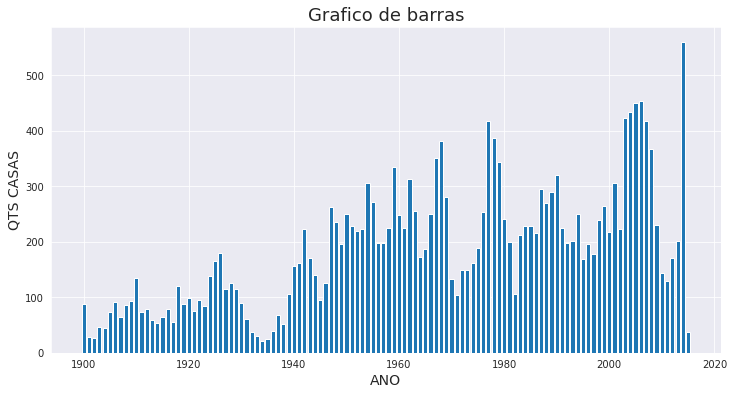

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize=[12,6])
plt.bar(casa_por_ano['year'],casa_por_ano['yr_built'])
#sns.barplot( x = casa_por_ano['year'] , y = casa_por_ano['yr_built'])   
plt.title('Grafico de barras', fontsize=18)
plt.xlabel('Ano'.upper(), fontsize=14)
plt.ylabel('Qts Casas'.upper(), fontsize=14)
plt.show()

Neste segundo gráfico, histograma, podemos olhar em conjuntos de anos, neste nosso caso teremos uma barra para cada 5 anos. Podemos analisar que o comportamento se mantém, mas a visualização fica mais fácil, mais limpa.

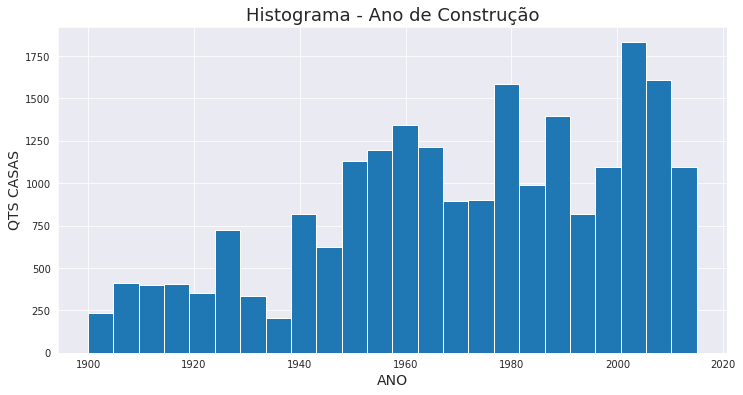

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize=[12,6])
plt.hist(house['yr_built'], bins = 24)   #bins = números de barras
plt.title('Histograma - Ano de Construção', fontsize=18)
plt.xlabel('Ano'.upper(), fontsize=14)
plt.ylabel('Qts Casas'.upper(), fontsize=14)
plt.show()

Olhando os gráficos assim, conseguimos ver que a construção das casas naquela região nunca pararam, e vem aumentando. Em 2014 tivemos o maior número de casas construídas, acredito que isso mostra ser uma região muito valorizada, onde é vantajoso investir em construções até os dias atuais.

Aproveitando que estamos olhando o ano de construção, vamos ver a relação com o preço: 

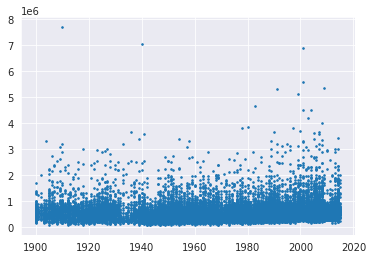

In [ ]:
plt.scatter(house['yr_built'],house['price'],s=2.5)

Conseguimos ver que não tem uma relação muito direta, até porque essas casas podem ter sido reformadas. Então vamos tentar olhar outras variáveis para ver quais tem uma relação direta com o preço. Vou começar olhando para o tamanho das casas e dos terrenos.

Agora então vamos usar o gráfico de dispersão para compararmos o tamanho da casa com seus preços, estes em dólares.

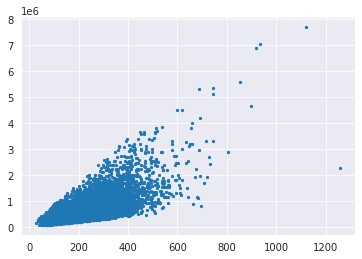

In [ ]:
plt.scatter(house['sqft_living'],house['price'],s=5)

In [ ]:
house.sort_values(by=['sqft_living'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,comp_living
19452,142000.0,0,0.00,26.94,1939.35,1.0,0,0,1,1,26.94,0.00,1963,0,98024,47.5308,-121.888,150.50,2122.83,-123.56
15381,276000.0,1,0.75,34.37,167.32,1.0,0,0,5,5,34.37,0.00,1923,0,98117,47.6778,-122.389,124.49,464.52,-90.12
860,245000.0,1,0.75,35.30,1393.54,1.0,0,0,3,5,35.30,0.00,1963,0,98168,47.4810,-122.323,108.70,1393.54,-73.40
18379,265000.0,0,0.75,35.67,19829.59,1.0,0,0,3,4,35.67,0.00,2003,0,98070,47.4177,-122.491,178.37,20841.95,-142.70
4868,228000.0,0,1.00,36.23,548.13,1.0,0,0,2,4,36.23,0.00,1953,0,98118,47.5260,-122.261,201.60,557.42,-165.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,4668000.0,5,6.75,895.58,1214.06,1.0,1,4,3,12,447.79,447.79,1983,2009,98040,47.5570,-122.210,303.79,971.21,591.79
9254,6885000.0,6,7.75,918.81,2914.74,2.0,0,4,3,13,823.12,95.69,2001,0,98039,47.6305,-122.240,421.78,3969.75,497.03
3914,7062500.0,5,4.50,932.75,3467.60,2.0,1,2,3,11,713.50,219.25,1940,2001,98004,47.6500,-122.214,365.11,2364.29,567.64
7252,7700000.0,6,8.00,1119.48,2564.12,2.5,0,3,4,13,796.18,323.30,1910,1987,98102,47.6298,-122.323,366.04,817.55,753.44


Olhando para o gráfico e para a tabela, na qual podemos ver em ordem as casas com maiores e menores metragem, apesar sim de ter uma relação direta dos preços, podemos ver que a casa com a maior metragem não é a mais cara. Justamente com esse tipo de análise que entemos a real necessidade de fazer uma regressão linear, é a unica maneira para predizer valores. A olho nu, olhando variáveis separadas é quase impossível chegar a este tipo de conclusão.

Outra conclusão que podemos chegar, é que esse gráfico tem o comportamento bem parecido ao da diferença da área da casa com a área da casa com os 15 vizinhos mais próximos, o que é justificável porque um dado tem total dependência ao outro outro.

In [ ]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,comp_living
0,221900.0,3,1.00,109.63,524.90,1.0,0,0,3,7,109.63,0.00,1955,0,98178,47.5112,-122.257,124.49,524.90,-14.86
1,538000.0,3,2.25,238.76,672.80,2.0,0,0,3,7,201.60,37.16,1951,1991,98125,47.7210,-122.319,157.01,709.69,81.75
2,180000.0,2,1.00,71.54,929.03,1.0,0,0,3,6,71.54,0.00,1933,0,98028,47.7379,-122.233,252.70,748.98,-181.16
3,604000.0,4,3.00,182.09,464.52,1.0,0,0,5,7,97.55,84.54,1965,0,98136,47.5208,-122.393,126.35,464.52,55.74
4,510000.0,3,2.00,156.08,750.66,1.0,0,0,3,8,156.08,0.00,1987,0,98074,47.6168,-122.045,167.23,697.05,-11.15


A sua visualização responde uma das suas perguntas? Se não, o que ela responde?

**RESPOSTA** (VALE 0.75 pontos): (responda aqui, dê dois cliques para editar)

Sim, conseguimos ter uma boa resposta olhando para os gráficos, podemos olhar os dados das colunas com outros olhos, tem um panorama diferente, o que ajuda não só nós mas sim quem for olhar pela primeira vez, deixa o trabalho muito mais comunicativo.

# Exercicio 3. (3 pontos)

Faremos uma analise exploratoria sobre estes dados, preencha abaixo analises sobre o conjunto de dados. Para isso a biblioteca numpy para obter a contagem, média, mediana e os quartis.

Vamos tabalhar com o tamanho das casas, atribuindo variaveis para cada contagem.

In [ ]:
#### (VALE 0.75 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

media_casas = np.mean(house['sqft_living'])
mediana_casas = np.median(house['sqft_living'])
quartil_1_casas = np.quantile(house['sqft_living'],0.25)
quartil_3_casas = np.quantile(house['sqft_living'],0.75)

In [ ]:
# VALE 0.75 pontos
# Substitua __ pelos valores solicitados
print('Existem {} observações no conjunto de dados'.format(house.shape[0]))
print('Existem {} variaveis no conjunto de dados'.format(house.shape[1]))
print('O tamanho médio das casa é de {} metros quadrados'.format(round(media_casas,2)))
print('A mediana do tamanho das casas é de {} metros quadrados'.format(mediana_casas))

# Quartis
print('primeiro quartil {} do tamanho das casas'.format(quartil_1_casas))
print('terceiro quartil {} do tamanho das casas'.format(quartil_3_casas))

Existem 21613 observações no conjunto de dados
Existem 20 variaveis no conjunto de dados
O tamanho médio das casa é de 193.23 metros quadrados
A mediana do tamanho das casas é de 177.44 metros quadrados
primeiro quartil 132.57 do tamanho das casas
terceiro quartil 236.9 do tamanho das casas


Neste conjunto de dados há casas com tamanho muito acima ou abaixo do esperado (outliers)? Faça um gráfico de caixa (boxplot) do tamanho das casas.

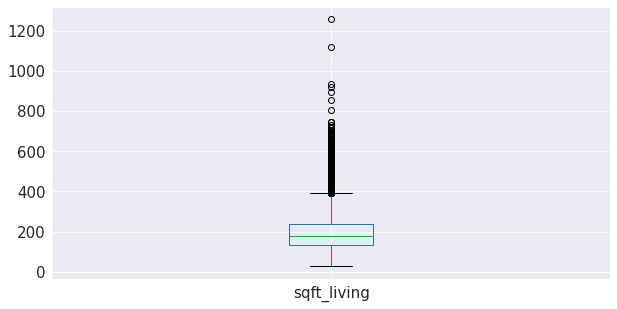

In [ ]:
#### (VALE 0.75 pontos)
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO
boxplot_casas = house.boxplot(column=['sqft_living'],grid=True, rot=0, fontsize=15,figsize=(10,5)) 

Observando a sua visualização, há casas com tamanhos muito abaixo ou acima do esperado (outliers)? 

Temos outliers acima do esperado, casas muito maiores que a maioria, enquanto a média está em 193,23 metros quadrados, temos casas gigantes em torno de 1000 metros quadrados, o que mostra uma grande diferença.

Gráfico de histograma dos preços - Ajuda a entender os outliers

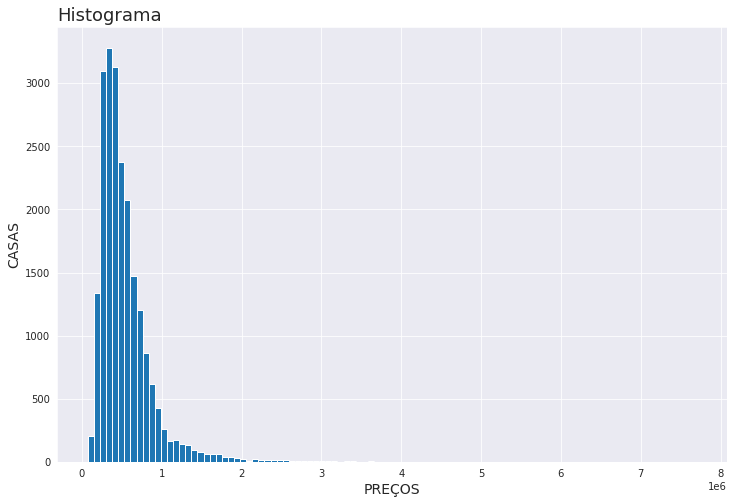

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize=[12,8])
ax = plt.hist(house['price'], bins = 100)   #bins = números de barras
plt.title('Histograma', loc='left', fontsize=18)
plt.xlabel('preços'.upper(), fontsize=14)
plt.ylabel('casas'.upper(), fontsize=14)
plt.show()

**RESPOSTA** (VALE 0.75 pontos): (responda aqui, dê dois cliques para editar)

A maioria das casas está entre os valores 0 e 1 milhão de dólares, porem têm casas com preços muito mais altos, neste gráfico nem é possível visualizar as casas com os maiores preços, para isso vamos utilizar um bloxplot para visualizar melhor

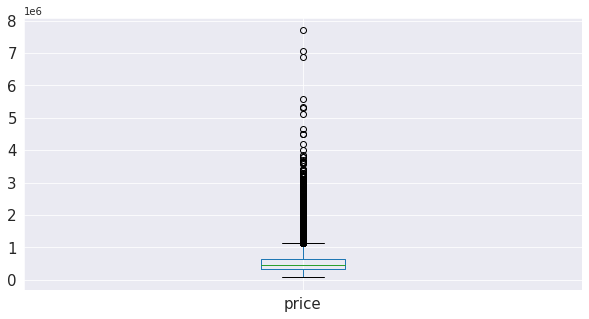

In [ ]:
boxplot_casas = house.boxplot(column=['price'],grid=True, rot=0, fontsize=15,figsize=(10,5)) 

Neste ultimo gráfico temos a real dimensão de quão discrepante são algumas casas, chegando, a mais cara, a quase a 8 milhões de dólares. Para conseguir ver estes números, vamos obter a contagem, feita anteriormente com a área da casa, agora com os preços.

In [ ]:
media_casas_price = np.mean(house['price'])
mediana_casas_price = np.median(house['price'])
quartil_1_casas_price = np.quantile(house['price'],0.25)
quartil_3_casas_price = np.quantile(house['price'],0.75)

In [ ]:
print('O preço médio das casa é de {} dolares'.format(round(media_casas_price,2)))
print('A mediana do preço das casas é de {} dolares'.format(mediana_casas_price))
print('primeiro quartil {} do preço das casas'.format(quartil_1_casas_price))
print('terceiro quartil {} do preço das casas'.format(quartil_3_casas_price))
print('Casa com o maior preço: {} $'.format(house['price'].max()))
print('Casa com o menor preço: {} $'.format(house['price'].min()))

O preço médio das casa é de 540088.14 dolares
A mediana do preço das casas é de 450000.0 dolares
primeiro quartil 321950.0 do preço das casas
terceiro quartil 645000.0 do preço das casas
Casa com o maior preço: 7700000.0 $
Casa com o menor preço: 75000.0 $


Deste modo conseguimos ter uma visão geral bem ampla dos nossos dados, entender melhor com que tipo de dados estamos trabalhando. Desta forma podemos partir para a parte final, construir o modelo e comparar os resultados.

# Exercicio 4. (4 pontos)

Construa um modelo de regressão linear para predizer a variável **price** (preço) com **statsmodels.api**.

Primeiramente vamos dividir a nossa tabela em X e y, X sendo os dados independentes e y o preço, valor dependente.

In [ ]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

X = house.drop(columns = 'price')
y = house['price']

In [ ]:
y = pd.DataFrame(y)
mod = sm.OLS(y,X)
res = mod.fit()

Coloque abaixo a saida do seu modelo usando **seu_modelo.summary()**.

In [ ]:
#### (VALE 0.625 pontos)
#### EXECUTE O COMANDO ABAIXO

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.144e+04
Date:                Mon, 25 Apr 2022   Prob (F-statistic):                        0.00
Time:                        12:21:22   Log-Likelihood:                     -2.9461e+05
No. Observations:               21613   AIC:                                  5.892e+05
Df Residuals:                   21595   BIC:                                  5.894e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.551e+04   1888.729    -18.802      0.000   -3.92e+04   -3.18e+04
bathrooms      4.106e+04   3253.784     12.618      0.000    3.47e+04    4.74e+04
sqft_living   -2.367e+05   2.86e+05     -0.828      0.408   -7.97e+05    3.24e+05
sqft_lot          1.4350      0.515      2.784      0.005       0.425       2.445
floors         5276.1731   3541.418      1.490      0.136   -1665.267    1.22e+04
waterfront     5.833e+05   1.74e+04     33.599      0.000    5.49e+05    6.17e+05
view           5.236e+04   2128.313     24.600      0.000    4.82e+04    5.65e+04
condition      2.721e+04   2323.836     11.709      0.000    2.27e+04    3.18e+04
grade          9.546e+04   2145.636     44.491      0.000    9.13e+04    9.97e+04
sqft_above     3.571e+05   4.29e+05      0.833      0.405   -4.84e+05     1.2e+06
sqft_basement  3.568e+05   4.29e+05      0.832      0.406   -4.84e+05     1.2e+06
yr_built      -2561.8350     68.007    -37.670      0.000   -2695.133   -2428.537
yr_renovated     20.4345      3.646      5.604      0.000      13.287      27.582
zipcode        -518.9798     17.826    -29.113      0.000    -553.921    -484.039
lat            6.021e+05   1.07e+04     56.096      0.000    5.81e+05    6.23e+05
long          -2.179e+05   1.31e+04    -16.679      0.000   -2.43e+05   -1.92e+05
sqft_living15 -1.182e+05   1.43e+05     -0.827      0.408   -3.99e+05    1.62e+05
sqft_lot15       -4.0458      0.788     -5.133      0.000      -5.591      -2.501
comp_living   -1.185e+05   1.43e+05     -0.829      0.407   -3.99e+05    1.62e+05
==============================================================================
Omnibus:                    18398.945   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1871985.384
Skew:                           3.571   Prob(JB):                         0.00
Kurtosis:                      48.030   Cond. No.                     4.67e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.53e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Faça outro modelo usando a biblioteca **sklearn**.

In [ ]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

resultado = pd.DataFrame({'Métrica':['R²','MAE']})

def metodo_sklearn(X,y,m):
  # Normalizando X
  X_std = StandardScaler().fit_transform(X)
  # Vamos separar o conjunto de dados em treino e teste, definindo o tamanho do conjunto de dados 
  # em 20%. E para que tenhamos os mesmos resultados, usaremos a semente 10.
  X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2,random_state=10) 
  #Construiremos o nosso modelo de regressão usando o subconjunto de treino.
  lr = LinearRegression()
  #treinando o modelo
  lr.fit(X_train, y_train)
  #O nosso primeiro modelo está pronto, mas como então saberemos se é um bom modelo? 
  #Primeiro, usaremos o nosso modelo para predizer a variavel y do conjunto de teste usando o conjunto X de teste
  y_pred = lr.predict(X_test)
  #MÉTRICAS:
  #Coeficiente de determinacao
  r2 = round(r2_score(y_test, y_pred),4)
  #Erro médio absoluto
  MAE_erro = round(mae(y_test, y_pred),4) 
  resultado[m] = [r2,MAE_erro]
  return resultado                                     

Qual o valor de ${R}^{2}$ e $MAE$ obtido?

In [ ]:
modelo = 'Modelo 1'
metodo_sklearn(X,y,modelo)

,Métrica,Modelo 1
0,R²,0.7028
1,MAE,123571.1445


**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

Tivemos um R² relativamente bom, porem acredito que trabalhando com as variáveis podemos melhorá-lo. Mas temos que analisar também se vale a pena tirar algumas variáveis para melhorar o R². Muitas vezes nem sempre buscamos o melhor R² mas sim o valor mais real, isso quer dizer que é preferível algumas vezes ter um R² menor e não perder dados importantes, pois isso pode fazer diferença nos casos reais.

Agora falando do MAE, erro médio absoluto, acredito que temos que melhorar, pois uma casa com 123571 dólares de diferença tem um peso enorme para o bolso do comprador. Claro que se for considerar a casa mais cara, é um valor insignificativo, mas se este erro ocorrer com a casa com o menor valor, por exemplo, que é em torno de 75000 dólares, isso é uma diferença absurda.

Faça novamente um novo modelo utilizando a seleção de caracteristicas, selecionando as 5 variaveis mais importantes.

In [ ]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
colunas_significantes = selector.get_feature_names_out()

Quais são as 5 variaveis mais importantes deste conjunto de dados?

In [ ]:
print(colunas_significantes)

['sqft_living' 'waterfront' 'sqft_above' 'sqft_basement' 'lat']


**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

Olhando para essas 5 variáveis que o programa selecionou por serem as mais significantes, surge algumas perguntas, porque o número de banheiros e o número de quartos não estão entre elas. Mas com certeza a primeira ninguém discute, é a 'sqft_living', área das casas

Só para entender vamos ver o gráfico dos banheiros e dos quartos aqui

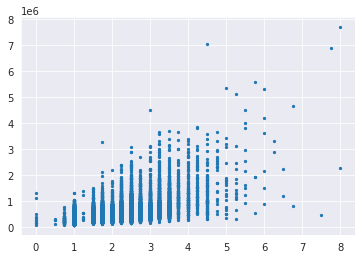

In [ ]:
plt.scatter(house['bathrooms'],house['price'],s=5)

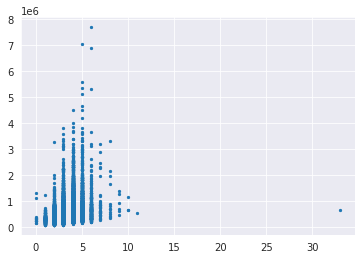

In [ ]:
plt.scatter(house['bedrooms'],house['price'],s=5)

E para nossa surpresa e talvez nem tanto das pessoas que trabalham e tem o conhecimento da área, essas duas variáveis realmente não tem uma relação muito direta. Com toda certeza elas têm interferência no preço e acredito que nunca deveriam ficar fora de um modelo, porem vendo os gráficos, é nítido que tem outras variaveis que fazem mais diferença diretamente no preço.

Porem para conhecimento e aprendizagem vamos olhar como vai se comportar o modelo com essas 5 variáveis selecionadas

MODELO 2

Vamos criar um modelo para essas novas colunas

In [ ]:
X = house[colunas_significantes]

Qual o valor de ${R}^{2}$ e $MAE$ deste novo modelo? Este modelo é melhor do que o anterior?

In [ ]:
modelo = "modelo 2"
metodo_sklearn(X,y,modelo)

,Métrica,Modelo 1,modelo 2
0,R²,0.7028,0.6242
1,MAE,123571.1445,147232.9987


**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

Como já era de se esperar o modelo acabou piorando, como foi dito anteriormente, é melhor muitas vezes trabalhar com todos os dados do que somente com os mais significantes, acabamos deixando muita informação pelo caminho.

Porem vamos tentar, usando o nosso conhecimento obtido nesse trabalho para tentar outros modelos, talvez tirando a comparação das áreas que foi vista e criada neste nosso trabalho.

In [ ]:
X = house.drop(columns = ['price','comp_living'])

In [ ]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,109.63,524.90,1.0,0,0,3,7,109.63,0.00,1955,0,98178,47.5112,-122.257,124.49,524.90
1,3,2.25,238.76,672.80,2.0,0,0,3,7,201.60,37.16,1951,1991,98125,47.7210,-122.319,157.01,709.69
2,2,1.00,71.54,929.03,1.0,0,0,3,6,71.54,0.00,1933,0,98028,47.7379,-122.233,252.70,748.98
3,4,3.00,182.09,464.52,1.0,0,0,5,7,97.55,84.54,1965,0,98136,47.5208,-122.393,126.35,464.52
4,3,2.00,156.08,750.66,1.0,0,0,3,8,156.08,0.00,1987,0,98074,47.6168,-122.045,167.23,697.05


In [ ]:
modelo = "modelo 3"
metodo_sklearn(X,y,modelo)

,Métrica,Modelo 1,modelo 2,modelo 3
0,R²,0.7028,0.6242,0.7028
1,MAE,123571.1445,147232.9987,123571.1445


Por incrível que pareça não teve nenhuma diferença, acredito ser porque ele é dependente de outra variável independente, logo para o método ele não faz diferença nenhuma.

Para finalizar o nosso trabalho vamos falar de possíveis melhorias que possam ajudar o nosso modelo a melhorar. Para começar, é interessante falar que tirar variáveis não seja interessante, mas então como melhorar, acreditamos que precisamos trabalhar melhor com estes dados. Vamos usar como exemplo o ZIPCODE, são números mas que na verdade estão classificadas como categóricas e isso é complicado para a regressão linear entender e tratar estes dados como deveriam. Então o objetivo para os próximos trabalhos é, entender melhor como a regressão linear trabalha e aprender como entrar com os dados o mais corretamente possível, para método nos devolver um modelo o mais preciso possível.